# Exploring the Impact of Extracurricular Activities on Secondary School Student Performance in Portugal

- **Author**: Nariman Avakoli, Marcela Flaherty, Yi Tang, Brianna Zhou
- **Group**: 13

## **1. Introduction**

Portugal's education system has low levels of education, high failure rates, and a significant number of students dropping out early (Caetano, 2012). An analysis of secondary students could help allocate resources for extracurricular activities to boost academic performance. Education levels impact GDP, growth, and child nutrition (Mukesh, Acharya & Pillai, 2023). Thus, it is essential for Portugal to prioritise improving its education system's performance. 

Extracurricular activities play a vital role in a student's holistic development, and understanding their potential impact on academic performance is essential for educators and policymakers (5 reasons why extra curricular activities are a key to your child's holistic development 2018). This project focuses on investigating the relationship between extracurricular activities and student performance in secondary education. 

- Our population of interest: all secondary school students in Portugal who are enrolled in the Mathematics and Portuguese language core courses. 

- The point estimate: the mean difference in final grades (G3) between students who participate in extracurricular activities and those who do not.

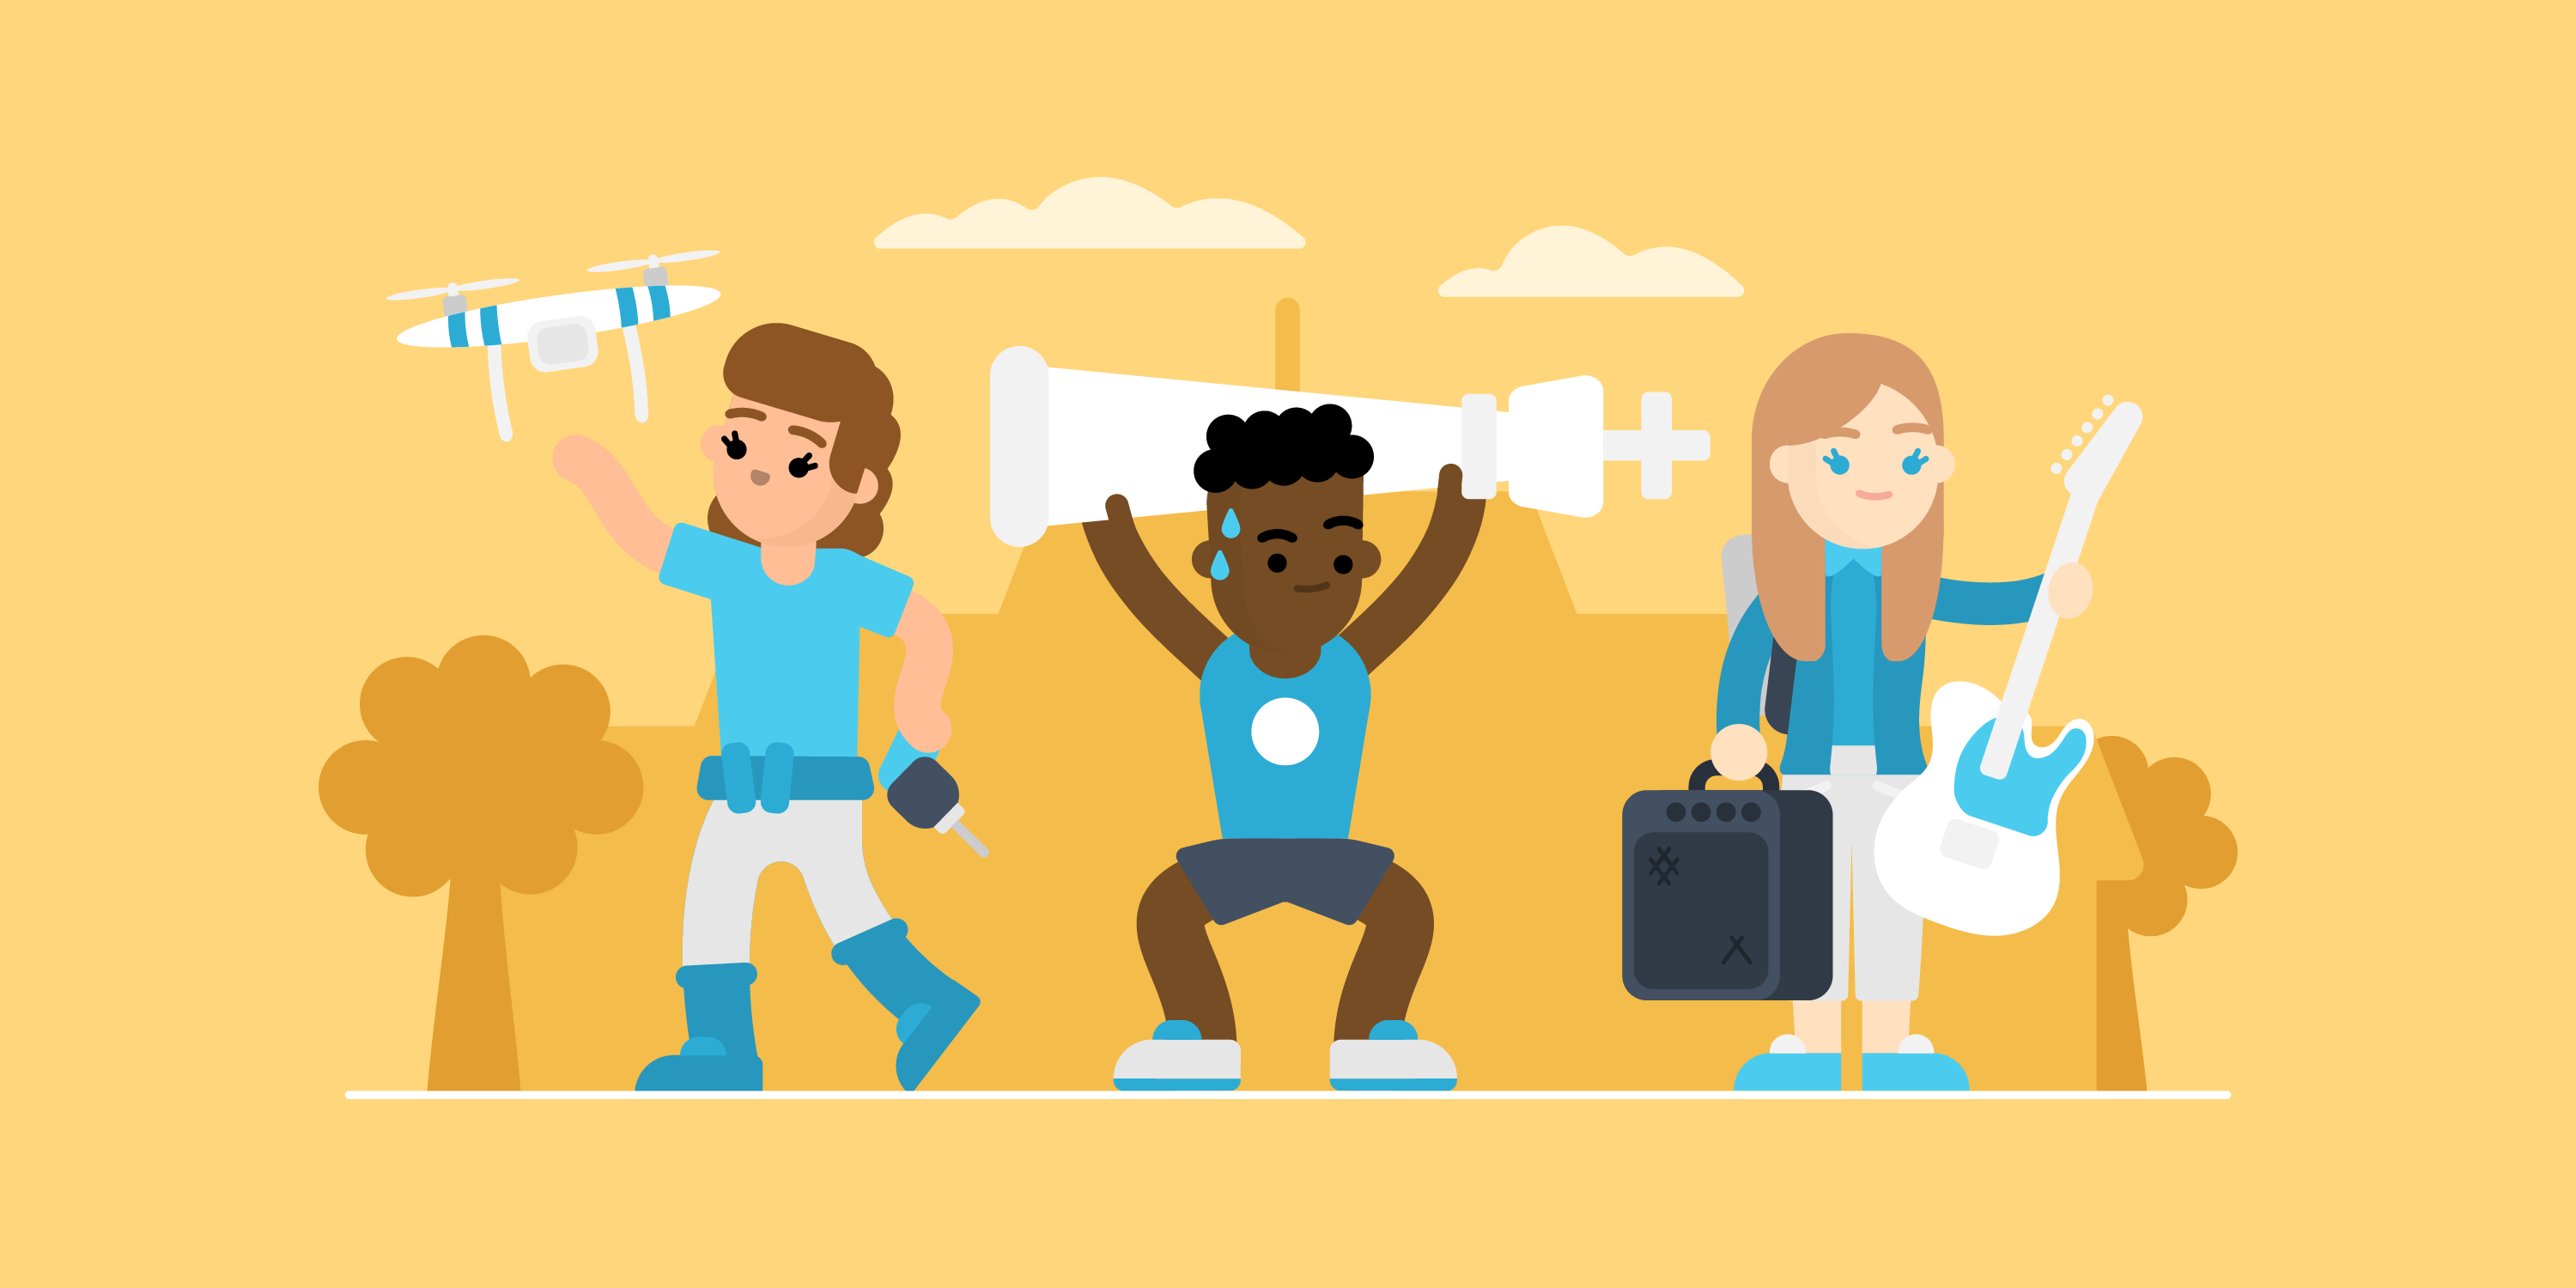

The data set which will be used is the [Student Performance Data Set](https://archive.ics.uci.edu/dataset/320/student+performance) from UCI machine learning repository. This dataset contains comprehensive information with 33 attributes, and 395 observations about student performance in the Mathematics course and 649 observations about student performance in the Portuguese course, including their participation in extracurricular activities.

Of the variables, below are the two of interest:

- `activities`: extra-curricular activities (binary: yes or no)

- `G3`: final grade (numeric: from 0 to 20, output target)

#### **By conducting two separate hypothesis tests in Mathematics and Portuguese courses, we will examine:**

#### Is there a significant difference in the final grades (G3) between students who participate in extracurricular activities and those who do not in each course?

## **2. Preliminary Results**

### 2.1.1 Loading relevant libraries

In [180]:
# Run this cell before continuing.
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)

### 2.1.2 Reading & Wrangling the datasets from the web into R

In [181]:
# reading Math course data and convert it to a dataframe
mat_data <- read_delim("data/student-mat.csv", delim = ";") %>% 
    as.data.frame()
head(mat_data, 4)
colnames(mat_data)
mat_data %>% nrow()
        
# reading Portuguese course data and convert it to a dataframe
por_data <- read_delim("data/student-por.csv", delim = ";") %>% 
    as.data.frame()
head(por_data, 4)
colnames(por_data)
por_data %>% nrow()

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15


[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

[1] 395

Rows: 649 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14


[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

[1] 649

In [182]:
# select two variables we need
mat_data <- mat_data %>%
    select(activities, G3)

head(mat_data)

# select two variables we need
por_data <- por_data %>%
    select(activities, G3)

head(por_data)

,activities,G3
,<chr>,<dbl>
1,no,6
2,no,6
3,no,10
4,yes,15
5,no,10
6,yes,15


,activities,G3
,<chr>,<dbl>
1,no,11
2,no,11
3,no,12
4,yes,14
5,no,13
6,yes,13


### 2.1.3 Exploratory Data Analysis

In [183]:
# summary table for math course
summary(mat_data)

# summary table for portuguese course
summary(por_data)

  activities              G3       
 Length:395         Min.   : 0.00  
 Class :character   1st Qu.: 8.00  
 Mode  :character   Median :11.00  
                    Mean   :10.42  
                    3rd Qu.:14.00  
                    Max.   :20.00  

  activities              G3       
 Length:649         Min.   : 0.00  
 Class :character   1st Qu.:10.00  
 Mode  :character   Median :12.00  
                    Mean   :11.91  
                    3rd Qu.:14.00  
                    Max.   :19.00  

In [184]:
# Point estimates of mean, median, and standard deviation for Math
mat_data_summary <- mat_data %>% 
    group_by(activities) %>% 
    summarize(Mean_mat_grade = mean(G3),
              Median_mat_grade = median(G3),
              SD_mat_grade = sd(G3),
              Num_mat_students = n())

mat_data_summary

activities,Mean_mat_grade,Median_mat_grade,SD_mat_grade,Num_mat_students
<chr>,<dbl>,<dbl>,<dbl>,<int>
no,10.34021,11,4.488065,194
yes,10.48756,11,4.679861,201


In [185]:
# Point estimates of mean, median, and standard deviation for Math
por_data_summary <- por_data %>% 
    group_by(activities) %>% 
    summarize(Mean_por_grade = mean(G3),
              Median_por_grade = median(G3),
              SD_por_grade = sd(G3),
              Num_por_students = n())

por_data_summary

activities,Mean_por_grade,Median_por_grade,SD_por_grade,Num_por_students
<chr>,<dbl>,<dbl>,<dbl>,<int>
no,11.71856,11,3.235290,334
yes,12.10476,12,3.218944,315


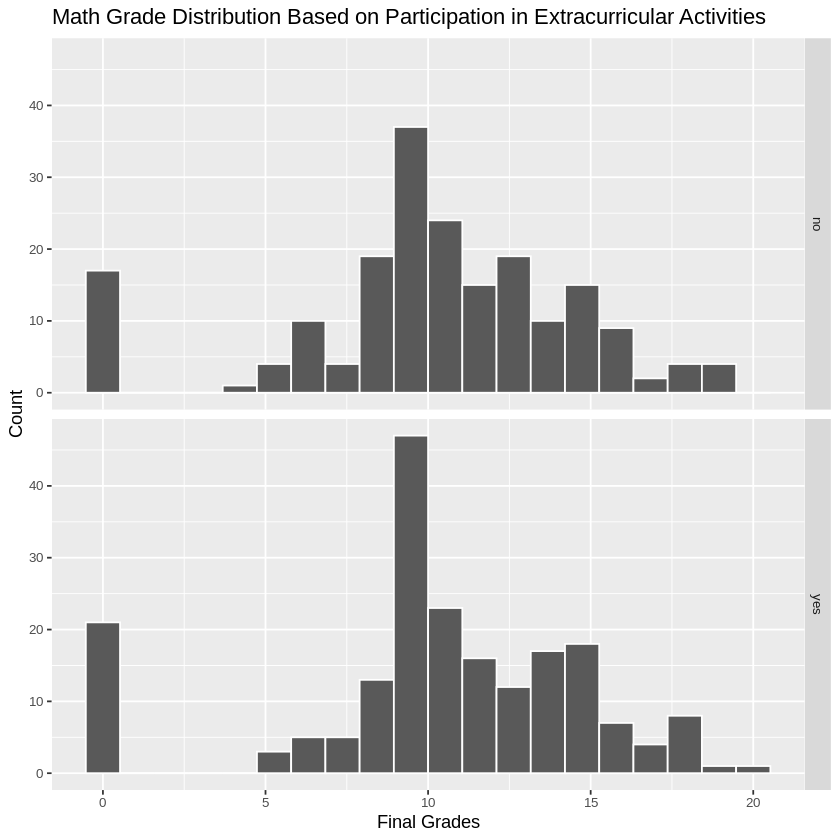

In [186]:
mat_data %>%
    ggplot(aes(x = G3)) +
    geom_histogram(bins = 20, color = "white") +
    facet_grid(activities ~ .) +
    labs(title = "Math Grade Distribution Based on Participation in Extracurricular Activities", x="Final Grades", y="Count") +
    theme(text = element_text(size = 10),
          title = element_text(size = 11))

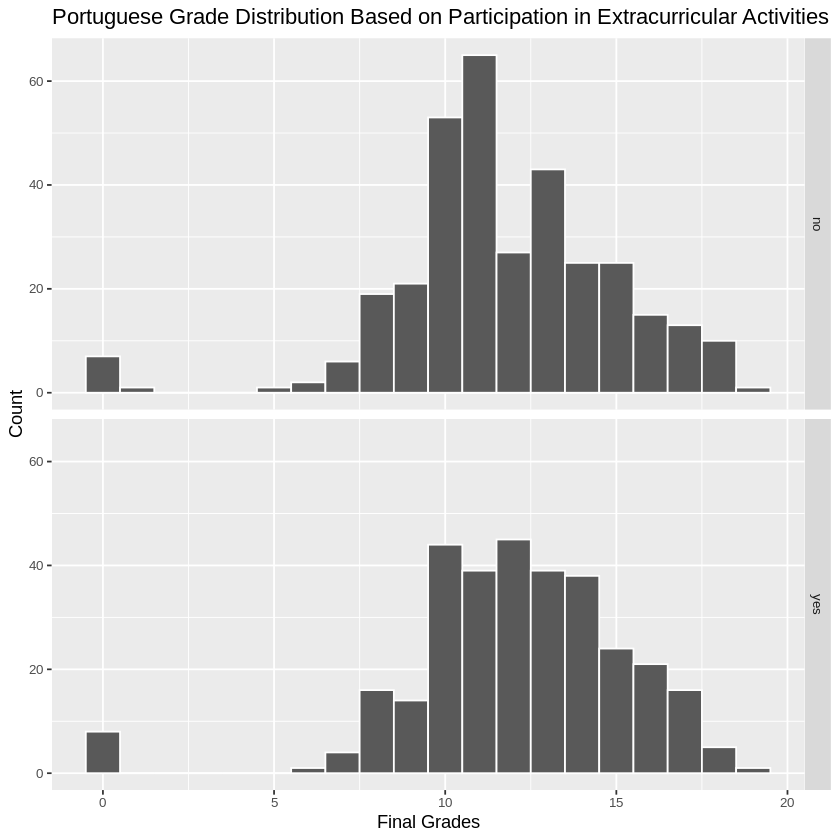

In [187]:
por_data %>%
    ggplot(aes(x = G3)) +
    geom_histogram(bins = 20, color = "white") +
    facet_grid(activities ~ .) +
    labs(title = "Portuguese Grade Distribution Based on Participation in Extracurricular Activities", x="Final Grades", y="Count") +
    theme(text = element_text(size = 10),
          title = element_text(size = 11))

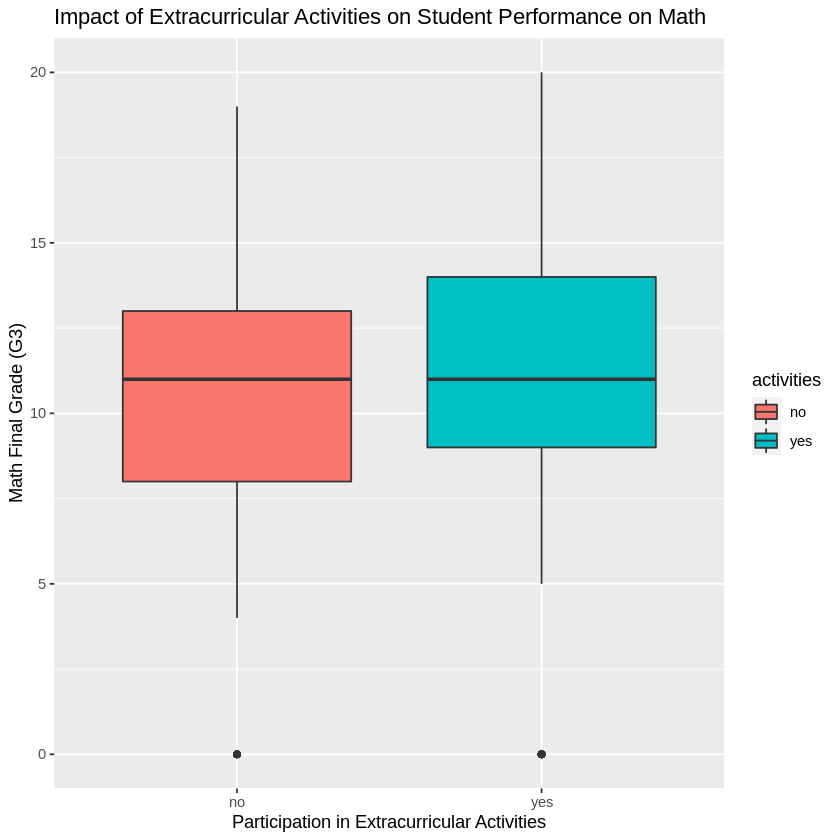

In [188]:
# Create a boxplot of Math grades based on participation in extracurricular activities
mat_data %>%
    ggplot(aes(x = activities, y = G3, fill = activities)) +
    geom_boxplot() +
    labs(x = "Participation in Extracurricular Activities", y = "Math Final Grade (G3)", 
    title = "Impact of Extracurricular Activities on Student Performance on Math") +
    theme(text = element_text(size = 11))

In [192]:
mat_diff <-
    mat_data_summary %>% 
    ungroup() %>%
    summarize(Math_mean_yes = Mean_mat_grade[activities == "yes"],
              Math_mean_no = Mean_mat_grade[activities == "no"],
              Math_mean_difference = Mean_mat_grade[activities == "yes"] - Mean_mat_grade[activities == "no"])

mat_diff

Math_mean_yes,Math_mean_no,Math_mean_difference
<dbl>,<dbl>,<dbl>
10.48756,10.34021,0.147356


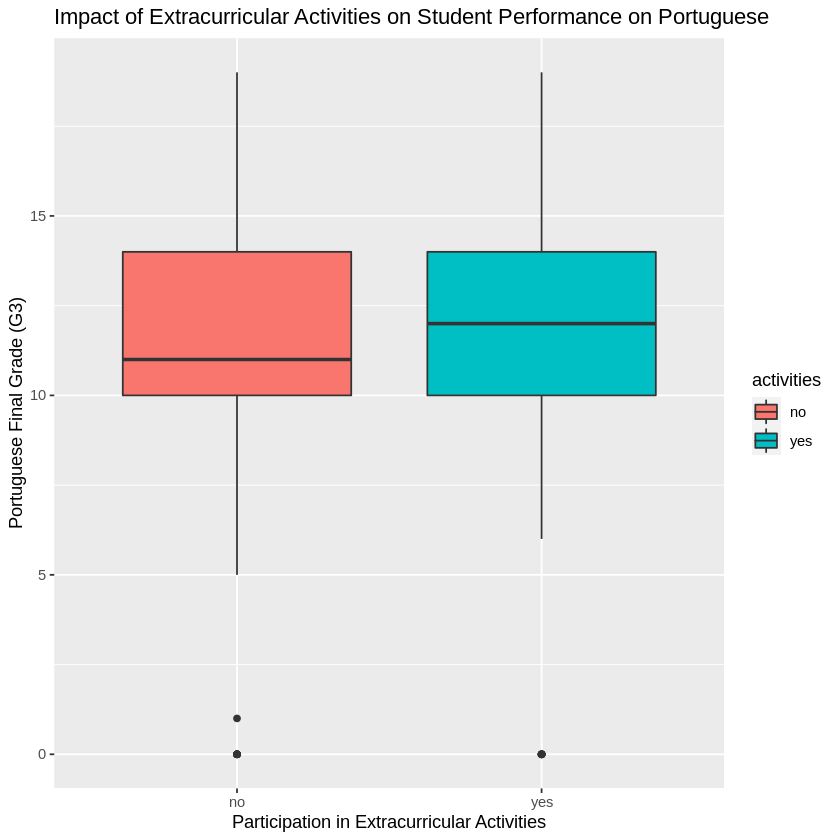

In [189]:
# Create a boxplot of Portuguese grades based on participation in extracurricular activities
por_data %>%
    ggplot(aes(x = activities, y = G3, fill = activities)) +
    geom_boxplot() +
    labs(x = "Participation in Extracurricular Activities", y = "Portuguese Final Grade (G3)", 
    title = "Impact of Extracurricular Activities on Student Performance on Portuguese") +
    theme(text = element_text(size = 11))

In [193]:
por_diff <-
    por_data_summary %>% 
    ungroup() %>%
    summarize(Por_mean_yes = Mean_por_grade[activities == "yes"],
              Por_mean_no = Mean_por_grade[activities == "no"],
              Por_mean_difference = Mean_por_grade[activities == "yes"] - Mean_por_grade[activities == "no"])

por_diff

Por_mean_yes,Por_mean_no,Por_mean_difference
<dbl>,<dbl>,<dbl>
12.10476,11.71856,0.386199
